In [1]:
import pandas as pd
import sonify
import numpy as np
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
#calaculates average for each week in last year (52 weeks)
#returns 52 data points, each for one week (turns to be around 25 seconds of sound)
#OUR METHOD FOR YEAR DATA
def data_year(data):
    week_avgs = np.array([])
    min_value = min(data)
    max_value = max(data)
    for a in range(0, 96*7*52, 96*7):
        week = data[a:a+96*7]
        avg = week.mean()
        avg = (((avg - min_value) * 255) / (max_value - min_value))
        week_avgs = np.append(week_avgs, avg)
    return week_avgs

In [3]:
#splits the day in 6 parts, 96 data points per day, day split by 16 for weekly data
#returns 42 data points
#OUR METHOD FOR WEEK DATA
def data_week(data):
    week_avg = np.array([])
    min_value = min(data)
    max_value = max(data)
    for a in range(0, 16*6*7, 16):
        week = data[a:a+16]
        avg = week.mean()
        avg = (((avg - min_value) * 255) / (max_value - min_value))
        week_avg = np.append(week_avg, avg)
    return week_avg

In [4]:
#splits the day in 2 parts, 96 data points per day, split by 42 for monthly data
#returns 60 data points
#OUR METHOD FOR MONTH DATA
def data_month(data):
    month_avg = np.array([])
    min_value = min(data)
    max_value = max(data)
    for a in range(0, 42*2*30, 42):
        month = data[a:a+42]
        avg = month.mean()
        avg = (((avg - min_value) * 255) / (max_value - min_value))
        month_avg = np.append(month_avg, avg)
    return month_avg

In [5]:
#function for a visual representation of the data 
def plot_data(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.plot(x, y3)
    ax.plot(x, y4)
    ax.plot(x, y5)
    ax.plot(x, y6)
    ax.plot(x, y7)
    ax.plot(x, y8)
    ax.plot(x, y9)
    ax.set(xlabel=x_label, ylabel=y_label, title=title)
    ax.grid()
    plt.show()

In [6]:
#reading the data
water_data = pd.read_csv('adaSensorData.csv')

In [7]:
#reading temperature data
temp = water_data['Temp']
temp_week = data_week(temp)
temp_month = data_month(temp)
temp_year = data_year(temp)
#reading pH data
pH = water_data['pH']
pH_week = data_week(pH)
pH_month = data_month(pH)
pH_year = data_year(pH)
#reading pHmv data
pHmv = water_data['pHmv']
pHmv_week = data_week(pHmv)
pHmv_month = data_month(pHmv)
pHmv_year = data_year(pHmv)
#readind Cond data
cond = water_data['Cond']
cond_week = data_week(cond)
cond_month = data_month(cond)
cond_year = data_year(cond)
#reading DOpct data
dopct = water_data['DOpct']
dopct_week = data_week(dopct)
dopct_month = data_month(dopct)
dopct_year = data_year(dopct)
#reading DOmgl data
domgl = water_data['DOmgl']
domgl_week = data_week(domgl)
domgl_month = data_month(domgl)
domgl_year = data_year(domgl)
#reading DOgain data
dogain = water_data['DOgain']
dogain_week = data_week(dogain)
dogain_month = data_month(dogain)
dogain_year = data_year(dogain)
#reading Turb data
turb = water_data['Turb']
turb_week = data_week(turb)
turb_month = data_month(turb)
turb_year = data_year(turb)
#reading Sal data
sal = water_data['Sal']
sal_week = data_week(sal)
sal_month = data_month(sal)
sal_year = data_year(sal)

In [8]:
#saving the data into the right format for sonification
#index values
week_index = []
for i in range(0, 42):
    week_index.append(i)
month_index = []
for i in range(0, 60):
    month_index.append(i)
year_index = []
for i in range(0, 52):
    year_index.append(i)
week_data = list(zip(week_index, temp_week))
month_data =list(zip(month_index, temp_month))
year_data = list(zip(year_index, temp_year))

In [75]:
#playing week data
sonify.play_midi_from_data(week_data)

Done playing!


In [76]:
#playing month data
sonify.play_midi_from_data(month_data)

Done playing!


In [77]:
#playing year data
sonify.play_midi_from_data(year_data)

Done playing!


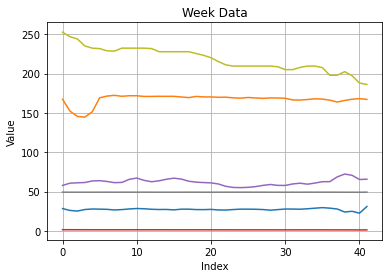

In [9]:
#plot for weekly data
plot_data(week_index, temp_week, pH_week,pHmv_week,cond_week,dopct_week,domgl_week,dogain_week,turb_week,
          sal_week, "Index", "Value", "Week Data")

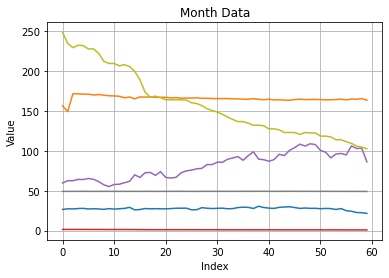

In [10]:
#plot for monthly data
plot_data(month_index, temp_month, pH_month,pHmv_month,cond_month,dopct_month,domgl_month,dogain_month,turb_month,
          sal_month, "Index", "Value", "Month Data")

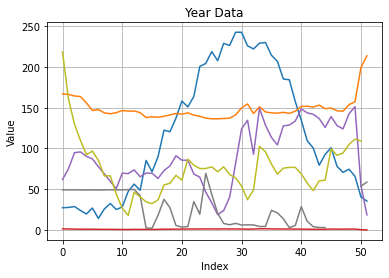

In [11]:
#plot for yearly data
plot_data(year_index, temp_year, pH_year,pHmv_year,cond_year,dopct_year,domgl_year,dogain_year,turb_year,
          sal_year, "Index", "Value", "Year Data")